# SIXT33N Project
## Phase 2: System Identification

### EE 16B: Designing Information Devices and Systems II, Fall 2019
-----

**Name 1**:

**Login**: ee16b-


**Name 2**:

**Login**: ee16b-



## <span style="color:navy">Table Of Contents</span>
-----

* ### [Note](https://drive.google.com/file/d/1xzTYA6f5fV9g9JHr5-bfuNb7ilPQIgRr/view?usp=sharing)
* [Introduction](#intro)
* [Part 1: Installing the Encoders](#part1)
* [Part 2: Sensor Verification](#part2)
* [Part 3: Changing to Battery](#part3)
* [Part 4: Open Loop Data Collection and Parameter Estimation](#part4)
* [Part 5: Determining the Operating Point](#part5)
* [Part 6: Micboard Verification](#part6)

<a id='intro'></a>
## <span style="color:navy">Introduction</span>
-----

Please make sure to read the note before you begin the lab. 
**Remember to document all design choices you made and explain them in the project report.**

<a id='part1'></a>
## <span style="color:navy">Part 1: Installing the Encoders</span>
-----

### Materials: 
- 2 encoders (aka photointerrupter modules, shown below)
- 2 plastic encoder wheels (plastic wheel with lots of rectangular holes)
- Launchpad
- 8 jumper wires

### Tasks: 

**1. Put the photointerrupter modules in their slots as shown below.**
<br/><br/>
<center>
<img width="400px" src="images/proj-car-encoder1.jpg">
</center>

**2. Connect the encoders to the Launchpad as follows: **
* Use 4 jumper wires per encoder. You should **twist or braid all three wires from the encoder to the breadboard together** - this will help shield the signal wire from external noise sources.
* Connect the 'G' (ground) pins to ground on your breadboard.
* Connect the 'V' (voltage) pins to the 3.3V rail of your breadboard.
* For each of your 'S' (signal) pins: 
    - Build a voltage divider with reasonably-valued resistors.
    - Connect the encoder signal pin to the input of the voltage divider.  
* Connect the output (between the two resistors) of the left voltage divider to to Launchpad `P6.1` and the the output(between the two resistors) of the right voltage divider to `P6.2`.

<a id='part2'></a>

## <span style="color:navy">Part 2: Sensor Verification</span>
-----


### <span style="color:navy">Encoder Verification</span>


### Materials:
- Launchpad and cable
- Car with encoders installed

### Tasks: 

### Materials
- Launchpad + USB cable

In general, there are two major types of error in sensing the car's trajectory. The first is noise in the sensor signals. The second is from mechanical differences between the two sides of the car.

In this section we will test for and fix the first type of noise. The mechanical type primarily affects performance over long distances, so we can compensate for it after implementing closed-loop control.

### Tasks: 
1. Connect one of the ground pins on the launchpad to the ground rail of your breadboard.
2. **Connect the left motor's BJT to `P2.0` and the right motor's BJT to `P1.5`.**
3. Connect the USB.
4. Set your power supply to 9V and 400mA. Connect it to each voltage regulator and the motor switch.
5. **If your encoders are powered properly, the LED's on them should blink when you pass something through the encoders.**
- Remove the encoder wheels if they are on the car, and upload **`encoder_test_0_ticks.ino`** to the Launchpad.
- Open the serial monitor.
- **Set the baud rate to `38400`**.
- Press reset.
- Follow the instructions on the serial monitor.
    - **Your car wheels are going to move.** Make sure that the car is suspended above the desk. Don't let your car jump off the bench.
    - Switch 1, P2.1 is the bottom left button of the LaunchPad.
    - If your encoders are functioning properly, the serial monitor should print "Success" after each phase, and display all 0's (or at least no more than a few ticks) for the ticks per phase. Note that if your car is mis-wired, this could be a false negative.
11. Attach the encoder disk as shown below.
    - Make sure to remove the paper sticker (yes, it does come off) before you attach it. =
    - If some of the holes in the encoder were not fully cut out, use the flat end of the screwdriver (it's reversible!) to push the material out.
12. Re-run the tests. If your car is connected correctly, **the tests should show several hundred encoder ticks**, ruling out a false negative.

<img width="400px" src="images/proj-car-encoder2.jpg">




<a id='part3'></a>

## <span style="color:navy">Part 3: Changing to Battery Power</span>
-----

### Materials
- 2 9V rechargeable batteries + battery leads (knotted)

Now we want to use 9V batteries to run the car on the ground. 

***If you are testing things at the bench, use the benchtop power supply.*** The battery does not contain a lot of energy and the motors take a lot of power. If you leave it running it will only last a little over an hour. If the voltage of the battery drops below 7.8V, ask for a new one from your GSI.

### Tasks:
1. Take the power supply off the motor drivers.
  - **Never leave both the power supply and the battery connected at the same time. Don't do it.** Try to minimize the time they are both connected when switching power before transferring data. If you leave both connected for too long, the computer will not recognize your Launchpad due to power overload at the COM port. 
2. Connect one battery to the switch and the other to the voltage regulators.
   - The grounds of the 9V battery leads should go to the ground rail of the circuit.
3. Knot your battery leads as shown in the image below.
    - This will drastically decrease the chance that the leads will accidentally short and kill your battery.

<img width="200px" src="images/proj-batt-lead.jpg">

**4. Use your multimeter again to check that the output of your regulator is still 5V and nothing was shorted.</span>**

<span style="color:red"> 5. Up till now, the MSP has been powered through the computer via the USB. Disconnect the usb cable that's powering the MSP. To power it through the battery, connect the 5V pin on the MSP to the 5V row on your breadboard.</span>

<span style="color:red">6.  **Never** simultaneously power the MSP with both the computer (USB) and the 5V through your breadboard. </span>

### Summary:

At any point, your car should be powered with either of the following two configurations:

1. Tethered Configuration: When uploading launchpad code or downloading data to the computer: 

<img width="700px" src="images/PowerDiagram2.png">

2. Mobile configuration: When running the car away from the computer: 

<img width="700px" src="images/PowerDiagram1.png">



<a id='part4'></a>
## <span style="color:navy">Part 4: Open Loop Data Collection and Parameter Estimation</span>
-----

Now, you will collect the data by uploading the sketch **`dynamics_data.ino`**. Glance through the sketch - it records the position of each wheel while varying the input signal $u[k]$ linearly from HIGH_PWM to LOW_PWM and back up. The sampling period is $T_s = 500\mathrm{ms}$. A long sampling period is used to minimize error due to quantization, the rounding error from measuring only integer encoder ticks.

**Important: For this first test, make sure that you are using the first set of 5 parameters in code block `SID1`** (abbreviated from System ID 1). These parameters will sweep through the whole range of PWM values, from maximum to minimum and back to maximum, while collecting only 1 sample per PWM. This means **the car will stop for a short time in the middle of the test.**

### About data collection:
1. We will being using **`dynamics_data.ino`** to collect data for our car and read it to the serial monitor.
2. Upon being uploaded to the MSP, **`dynamics_data.ino`.** does either one of two things, depending on whether the **`WRITE`.** variable located at the top of the code is **`1`.** or **`0`.**. 
    - If **`WRITE == 1`.** - The car upon having the leftmost bottom button pressed will run and collect data, then write it into permanent memory, which will survive between resets and power supply removal. The collected data will be overwritten if data collection is run again.
    - If **`WRITE == 0`.** - The car upon having its leftmost bottom button pressed will read data collected from its last run onto the Serial Monitor

Here are somethings to keep in mind:

In general: 

- The leftmost button is unresponsive at times, so you may have to press it multiple times. You will know you have succeeded in making the MSP bend to your will if the LEDs blink.
- If things are still unresponsive, press the reset button.
- Don't connect both 5V from the voltage regulator and the USB from the computer to the MSP at the same time. This tends to fry the launchpad.

If running the car and collecting data:

- Remember if that the MSP needs power from 5 volts if not connected to the Computer
- Look for a large space to run your car 
- Your car will probably not go straight 

If reading the data from the MSP:

- The data is printed in lines as comma separated 3-tuples. 
- Copy and paste, ONLY these 3-tuples, nothing else.

### 5.1. Tasks:

Once you've copied data from the serial monitor, paste it into a text file called **`data_coarse.txt`.**
The example plot below shows an example of extreme differences between the two wheels. 

<img width="400px" src="images/example_coarse_data.png">

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

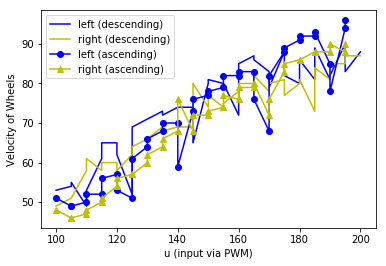

In [3]:
with open('data_coarse.txt', 'r') as file:
    data = np.array([[int(num) for num in line.strip().split(',')] for line in file.readlines()])

# compute velocity from distances
vleft  = data[:, 1]
vright = data[:, 2]


u = data[:, 0].reshape((-1, 1)) # duty cycle
left_des, left_asc = np.array_split(vleft, 2)

right_des, right_asc = np.array_split(vright, 2)

u_des, u_asc = np.array_split(u, 2)

plt.plot(u_des, left_des, 'b-',  u_des, right_des, 'y-')
plt.plot(u_asc, left_asc, 'b-o',  u_asc, right_asc, 'y-^')
plt.xlabel("u (input via PWM)")
plt.ylabel("Velocity of Wheels")
labels = ("left (descending)", "right (descending)",
          "left (ascending)" , "right (ascending)")
plt.legend(labels, loc=0)
plt.show()

Now we'll collect data appropriate for least-squares to find a linear approximation for the behavior of your motors. In normal operation, the car only has to run within a small range of velocities, so we collect more samples at each PWM, over a smaller PWM range. 

### 5.2. Tasks:
1. **Comment out the first set of 5 parameters and uncomment the second set in code block `SID1`.**
2. **Set *LOW_PWM* and *HIGH_PWM*** so that the chosen PWM range is (more or less) linear on your coarse plot from the previous step.
3. If your car makes *very* tight circles (ie: radius less than 1 ft), talk to your GSI!
4. **Copy the numerical data between two "Start" lines to a text file called `data_fine.txt`**, like you did for `data_coarse`.
5. Perform least-squares regression on your data as outlined in the sections below entitled **Least-Squares Regression** and **Evaluate Your Fit**.

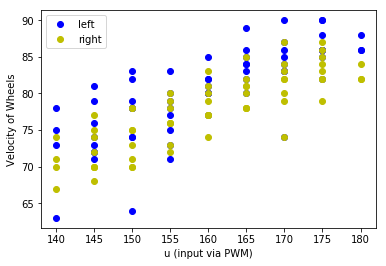

In [34]:
with open('data_fine.txt', 'r') as file:
    data = np.array([[int(num) for num in line.strip().split(',')] for line in file.readlines()])
    
# compute velocity from distances
vleft  = data[:, 1]
vright = data[:, 2]

u = data[:, 0].reshape((-1, 1)) # duty cycle

plt.plot(u, vleft, 'bo',  u, vright, 'yo')
plt.xlabel("u (input via PWM)")
plt.ylabel("Velocity of Wheels")
plt.legend(("left", "right"), loc=0)
plt.show()

### 5.2.1. Least-Squares Regression
Now that we have some data, we can try performing least-squares regression.


1. Write a function that takes the data as parameters, performs least squares, and extracts the parameters. The function `np.linalg.lstsq` will be helpful here.
2. Call the function once for each wheel.
3. Record the values of $\theta$ and $\beta$ for each wheel.

In [35]:
# YOUR CODE HERE
# Write a function that formulates and performs least squares
# and returns theta and beta for one wheel
def identify_parameters(u, v):
    # Returns (theta, beta) for given (u, v)
    # theta is slope, beta is y-intercept
    # want 0th index of output as result
    A = np.column_stack((u,np.ones(len(u))*-1))
    t, b = np.linalg.lstsq(A, v)[0]
    return t, b

# extract parameters, call your function here
theta_left, beta_left = identify_parameters(u, vleft) # 0, 0
theta_right, beta_right = identify_parameters(u, vright) # 0, 0

print("float theta_left = {:.4g};".format(theta_left))
print("float theta_right = {:.4g};".format(theta_right))
print("float beta_left = {:.4g};".format(beta_left))
print("float beta_right = {:.4g};".format(beta_right))

float theta_left = 0.3975;
float theta_right = 0.3609;
float beta_left = -16.85;
float beta_right = -20.08;


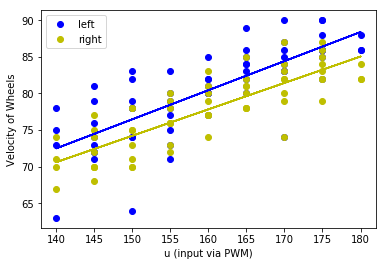

In [36]:
# plot results of least squares fit 
u = u.reshape(-1)
vleft_LS = theta_left*u-beta_left
vright_LS = theta_right*u-beta_right
plt.plot(u, vleft, 'bo',  u, vright, 'yo', u, vleft_LS, 'b-', u, vright_LS, 'y-')
plt.xlabel("u (input via PWM)")
plt.ylabel("Velocity of Wheels")
plt.legend(("left", "right"), loc=0)

### 5.2.2. Evaluate Your Fit

1. **Inspect the linearity of this plot and the coarse data plot.**
2. **If you think a different range of PWM may be more linear, change HIGH_PWM and LOW_PWM in the .ino file.**
    - Be careful so your car does not run too close to the minimum or maximum PWM (0 and 255).
    - If our control scheme saturates (e.g. maxes at 255) an input, the car is much harder to control.
3. Run the simulation below.

To test that we have estimated the parameters accurately, we will simulate the model using the parameters we have found. When we compare the simulated data with the collected data, we expect them to match up pretty well. 

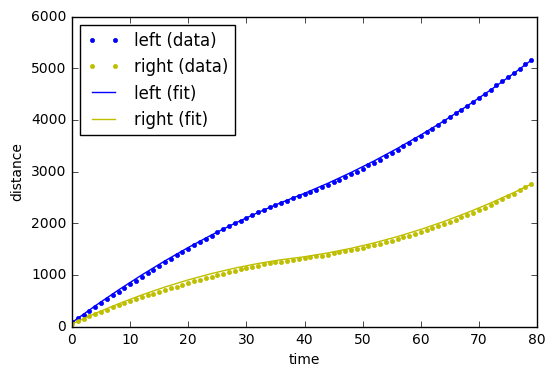

In [6]:
# model for simulation 
def sim(d0, u, theta, beta):
    d = np.zeros(len(u)+1)
    d[0] = d0
    for t in range(len(u)):
        d[t+1] = d[t] + theta*u[t] - beta
    return d
def get_distances_from_velocities(v):
    d = np.zeros(len(u) + 1)
    d[0] = 0
    for t in range(len(u)):
        d[t+1] = d[t] + v[t] 
    return d
        
# plot simulated trajectories 

dleft = get_distances_from_velocities(vleft)
dright = get_distances_from_velocities(vright)

dleft_simulated  = sim(0, u, theta_left, beta_left)
dright_simulated = sim(0, u, theta_right, beta_right)
plt.plot(dleft, 'b.', 
         dright, 'y.',
         dleft_simulated, 'b-', 
         dright_simulated, 'y-',
        )
plt.xlabel("time")
plt.ylabel("distance")
plt.legend(("left (data)", "right (data)", "left (fit)", "right (fit)"), loc='upper left')

<a id='part5'></a>
## <span style="color:navy">Part 5: Determining the Operating Point</span>
-----

**Make sure you read the linear least squares section of the note before beginning this section!**

In general, each wheel may have a different range of velocities, illustrated here.


<img src="./images/partial_overlap_lsq.png">


In order for the car to drive straight, the wheels must be moving at the same velocity. However, the motors (and hence the wheels) have different achievable velocity ranges, so we need to set the operating point to a velocity achievable by both wheels. A good choice of target velocity is the midpoint of the overlapping range of velocity. The below cell will calculate this.

Velocity range = [72.5, 85.0]

Operating point:
float v_star = 78.8;


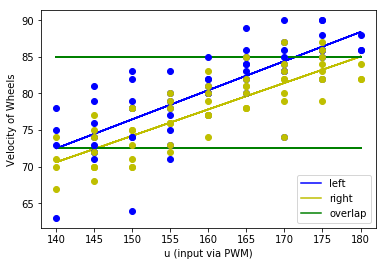

In [37]:
min_vel = max(min(vleft_LS), min(vright_LS))
max_vel = min(max(vleft_LS), max(vright_LS))
print('Velocity range = [{:0.1f}, {:0.1f}]'.format(min_vel, max_vel))
midpoint = (min_vel+max_vel)/2
print('\nOperating point:\nfloat v_star = {:.1f};'.format(midpoint))

u = u.reshape(-1)
vleft_LS = theta_left*u-beta_left
vright_LS = theta_right*u-beta_right
plt.plot(u, vleft_LS, 'b-', u, vright_LS, 'y-')
for i in (min_vel, max_vel):
    plt.plot(u, 0*u + i, 'g-')
plt.plot(u, vleft, 'bo',  u, vright, 'yo')
plt.xlabel("u (input via PWM)")
plt.ylabel("Velocity of Wheels")
plt.legend(("left", "right", "overlap"), loc=0)

<a id='part6'></a>
## <span style="color:navy">Part 6: Micboard Verification (optional)</span>
-----

We will be using the micboard again in about 2 weeks. It is good to verify that the launchpad can read the voice signal from your front-end circuit. 

### Materials:
- Car
- Launchpad + USB cable

### Tasks:
1. Upload <b>`adc_read.ino`</b> to the Launchpad.
2. Connect pin `6.0` to the output of your microphone front-end circuit.
3. Connect the ground of the Launchpad to the ground of your circuit.
4. **Press the reset button on your Launchpad.**
5. From the command line, run **`python adc_read.py -D COM###`** (substitute `###` with the proper number from Device Manager).

If you see a graph on your screen with a signal that changes when you make noises at your microphone and is centered in the middle of the graph, then you have succeeded! Congratulations!

If this step fails, make sure that you make it work before the SVD/PCA lab in 2 weeks. You won't be able to do that lab without going through this step!

## <span style="color:#ba190f">CHECKOFF</span>
-----
- **Show your GSI your data collection and parameters.** Your GSI will double check your parameters.
 
 ## <span style="color:red">SAVE ALL YOUR DATA!!</span>
 - ** Data stored on the lab computers often gets deleted automatically. Please store it on your personal flash drive  or cloud storage, and not on the lab computers!**